<a href="https://colab.research.google.com/github/PondKann/KKU_data_mining/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/TTGDFf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search``` ```วันในที่ทำการ search``` ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
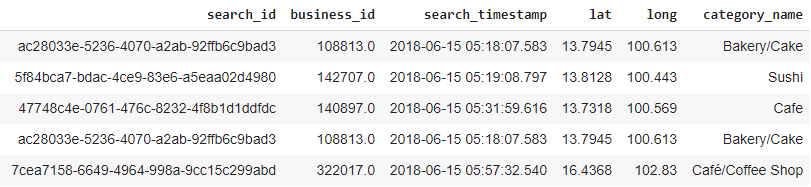

(200 คะแนน)

In [ ]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

# ข้อ 1 

In [5]:
# เชื่อม Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import pandas as pd

In [7]:
path = '/content/drive/My Drive/FinalDWDM'

In [8]:
os.listdir(path)

['search_request.csv',
 'metadata.xlsx',
 'reduced_marketbasket.csv',
 'search_click.csv',
 'w_restaurant.csv']

In [9]:
# join path กับ ไฟล์ข้อมูล
w_restaurant = os.path.join(path,'w_restaurant.csv')
search_click = os.path.join(path,'search_click.csv')
search_request = os.path.join(path,'search_request.csv')

### อ่านไฟล์

In [10]:
w_restaurant_df = pd.read_csv(w_restaurant)
w_restaurant_df.head()

,Unnamed: 0,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [11]:
search_click_df = pd.read_csv(search_click) 
search_click_df.head()

,Unnamed: 0,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,0,2018-06-15 05:11:38.914154,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2222397704154000,True
1,1,2018-06-15 06:30:51.277476,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,460838273476000,True
2,2,2018-06-15 06:32:09.558025,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2581491438025000,True
3,3,2018-06-15 06:00:59.820390,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1404578985390000,True
4,4,2018-06-15 05:23:36.828525,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,933358625525000,True


In [12]:
search_request_df = pd.read_csv(search_request) 
search_request_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [13]:
search_request_df.isnull()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10004352,False,False,False,False,True,False,False,False,True,True
10004353,False,False,False,False,True,True,False,False,True,True
10004354,False,False,False,False,True,True,False,False,True,True
10004355,False,False,False,False,True,False,False,False,True,True


### เชื่อมตาราง

In [14]:
#จากตาราง search_click_df เลือกมาแค่ คอลัมน์ search_id และ business_id
search_click_df1 = search_click_df[['search_id', 'business_id']]
search_click_df1.head()

,search_id,business_id
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0


In [15]:
search_click_df1.isnull()

,search_id,business_id
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7882032,False,False
7882033,False,False
7882034,False,False
7882035,False,False


In [16]:
#จากตาราง search_request_df เลือกมาแค่ คอลัมน์ search_id ,search_timestamp , lat , long
search_request_df1 = search_request_df[['search_id', 'search_timestamp', 'lat','long']]
search_request_df1.head()

,search_id,search_timestamp,lat,long
0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,12.6347,101.463
1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,14.8009,102.534
2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,13.7383,100.371
3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,12.6669,101.861
4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,12.2372,99.88


In [17]:
search_request_df1.isnull()

,search_id,search_timestamp,lat,long
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10004352,False,False,True,True
10004353,False,False,True,True
10004354,False,False,True,True
10004355,False,False,True,True


In [18]:
#จากตาราง w_restaurant_df เลือกมาแค่ คอลัมน์ id, category_name
w_restaurant_df1 = w_restaurant_df[['id','category_name']] 
w_restaurant_df1.head()

,id,category_name
0,2,Orthodontic
1,4,Quick Meal
2,5,Historical/Religion
3,6,Karaoke
4,7,Café/Coffee Shop


In [75]:
w_restaurant_df1.isnull()

,id,category_name
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
246842,False,False
246843,False,False
246844,False,False
246845,False,False


In [19]:
#นำตาราง search_click_df1  มา merge กับ ตาราง w_restaurant_df1 ด้วย คีย์ 'business_id'และ 'id'
table1 = search_click_df1.merge(w_restaurant_df1,how='left',left_on='business_id',right_on='id')
table1 

,search_id,business_id,id,category_name
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,298839.0,Seafood
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,171372.0,Japanese
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,16157.0,Cafe
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,89741.0,Dim Sum
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,189564.0,Japanese
...,...,...,...,...
7882032,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,16614.0,Healthy Food
7882033,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,16614.0,Healthy Food
7882034,d086453d-7fde-4766-af39-8205f0f0a4aa,19569.0,19569.0,Cafe
7882035,d157eba1-15e6-4f7a-b090-27a311d976a0,227719.0,227719.0,Thai


In [20]:
#นำตาราง table1  มา merge กับ ตาราง search_request_df1 ด้วย คีย์ 'search_id'
table2 = table1.merge(search_request_df1,how='left',left_on='search_id',right_on='search_id')
table2 

,search_id,business_id,id,category_name,search_timestamp,lat,long
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,298839.0,Seafood,NaN,NaN,NaN
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,171372.0,Japanese,NaN,NaN,NaN
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,16157.0,Cafe,NaN,NaN,NaN
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,89741.0,Dim Sum,NaN,NaN,NaN
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,189564.0,Japanese,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7882032,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,16614.0,Healthy Food,2018-06-28 01:59:06.275,13.758,100.56
7882033,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,16614.0,Healthy Food,2018-06-28 01:59:06.275,13.758,100.56
7882034,d086453d-7fde-4766-af39-8205f0f0a4aa,19569.0,19569.0,Cafe,2018-06-28 06:48:45.175,12.9324,100.885
7882035,d157eba1-15e6-4f7a-b090-27a311d976a0,227719.0,227719.0,Thai,2018-06-28 06:35:34.618,13.6908,101.083


In [21]:
#หลังจากรวมตารางแล้วให้เลือกมาเฉพาะคอลัมน์ที่ต้องการ
tb_df = table2[['search_id', 'business_id', 'search_timestamp', 'lat', 'long', 'category_name' ]]
tb_df.head()

,search_id,business_id,search_timestamp,lat,long,category_name
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,NaN,NaN,NaN,Seafood
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,NaN,NaN,NaN,Japanese
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,NaN,NaN,NaN,Cafe
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,NaN,NaN,NaN,Dim Sum
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,NaN,NaN,NaN,Japanese


In [22]:
tb_df.isnull()

,search_id,business_id,search_timestamp,lat,long,category_name
0,False,False,True,True,True,False
1,False,False,True,True,True,False
2,False,False,True,True,True,False
3,False,False,True,True,True,False
4,False,False,True,True,True,False
...,...,...,...,...,...,...
7882032,False,False,False,False,False,False
7882033,False,False,False,False,False,False
7882034,False,False,False,False,False,False
7882035,False,False,False,False,False,False


# ข้อ 2 

2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/TTGDFf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(80 คะแนน)

In [33]:
import os
import pandas as pd

In [28]:
os.listdir(path)

['search_request.csv',
 'metadata.xlsx',
 'reduced_marketbasket.csv',
 'search_click.csv',
 'w_restaurant.csv',
 'reduced2.csv']

In [34]:
reduced_marketbasket = os.path.join(path,'reduced_marketbasket.csv')

In [41]:
reduced_marketbasket_df  = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
reduced_marketbasket_df.head()
data = reduced_marketbasket_df

In [43]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [60]:
!pip install apyori

In [62]:
from apyori import apriori

In [57]:
data_UK = data[data['Country']=='United Kingdom']
data_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/09/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/09/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/09/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/09/2011 12:49,8.95,13113.0,United Kingdom


In [58]:
transecs_UK = data_UK.groupby('InvoiceNo')['StockCode'].apply(list)
transecs_UK

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 23494, dtype: object

In [65]:
As_UK = list(apriori(transecs_UK, min_support = 0.03, min_confidence = 0.2))
As_UK 

[RelationRecord(items=frozenset({'21931', '85099B'}), support=0.030092789648420874, ordered_statistics=[OrderedStatistic(items_base=frozenset({'21931'}), items_add=frozenset({'85099B'}), confidence=0.6163905841325196, lift=7.321274208093738), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'21931'}), confidence=0.3574317492416582, lift=7.3212742080937385)]),
 RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03375329871456542, ordered_statistics=[OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766211604095563, lift=8.036672165147682), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.40091001011122346, lift=8.036672165147682)]),
 RelationRecord(items=frozenset({'22699', '22697'}), support=0.03034817400187282, ordered_statistics=[OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7350515463917526, lift=17.21764808

จาก As_UK  จะเห็นได้ว่ารูปแบบที่ลูกค้าซื้อพร้อมกันที่ min_support = 0.03, min_confidence = 0.2 มีอยู่ 3 รูปแบบ

1. 21931, 85099B 

  เมื่อคนที่ซื้อสินค้า รหัส 21931 แล้วจะซื้อ สินค้า 85099B มีโอกาสเกิดขึ้น 61.64% , lift=7.321274208093738

  เมื่อคนที่ซื้อสินค้า รหัส 85099B แล้วจะซื้อ สินค้า  21931 มีโอกาสเกิดขึ้น 35.74% ,  lift=7.3212742080937385


2. 22386, 85099B 

  เมื่อคนที่ซื้อสินค้า รหัส 22386 แล้วจะซื้อ สินค้า 85099B มีโอกาสเกิดขึ้น 67.66% , lift = 8.036672165147682

  เมื่อคนที่ซื้อสินค้า รหัส 85099B แล้วจะซื้อ สินค้า  22386 มีโอกาสเกิดขึ้น 40.09% ,  lift=8.036672165147682

3. 22699, 22697

  เมื่อคนที่ซื้อสินค้า รหัส 22699 แล้วจะซื้อ สินค้า 22697 มีโอกาสเกิดขึ้น 71.08% , lift = 17.217648086667833

  เมื่อคนที่ซื้อสินค้า รหัส 22697 แล้วจะซื้อ สินค้า  22699 มีโอกาสเกิดขึ้น 73.50% ,  lift = 17.217648086667833






In [75]:
data[data['StockCode']=='21931']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
103,536378,21931,JUMBO STORAGE BAG SUKI,10,12/01/2010 09:37,1.95,14688.0,United Kingdom
510,536409,21931,JUMBO STORAGE BAG SUKI,2,12/01/2010 11:45,1.95,17908.0,United Kingdom
1070,536522,21931,JUMBO STORAGE BAG SUKI,1,12/01/2010 12:49,1.95,15012.0,United Kingdom
1437,536542,21931,JUMBO STORAGE BAG SUKI,40,12/01/2010 14:11,1.95,16456.0,United Kingdom
2619,536592,21931,JUMBO STORAGE BAG SUKI,1,12/01/2010 17:06,4.21,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
537100,581238,21931,JUMBO STORAGE BAG SUKI,7,12/08/2011 10:53,4.13,NaN,United Kingdom
538250,581403,21931,JUMBO STORAGE BAG SUKI,10,12/08/2011 13:46,2.08,13510.0,United Kingdom
540690,581492,21931,JUMBO STORAGE BAG SUKI,1,12/09/2011 10:03,4.13,NaN,United Kingdom
541370,581498,21931,JUMBO STORAGE BAG SUKI,6,12/09/2011 10:26,4.13,NaN,United Kingdom


In [76]:
data[data['StockCode']=='85099B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 09:57,1.65,16029.0,United Kingdom
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 10:19,1.65,17511.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/01/2010 11:45,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:23,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:49,1.95,15012.0,United Kingdom
...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,12/08/2011 14:38,2.08,14415.0,United Kingdom
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,12/08/2011 15:23,2.08,15898.0,United Kingdom
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,12/08/2011 16:30,4.13,NaN,United Kingdom
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/09/2011 09:38,2.08,17001.0,United Kingdom


In [66]:
data_nUK = data[data['Country']!='United Kingdom']
data_nUK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/01/2010 08:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/01/2010 08:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/01/2010 08:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/01/2010 08:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/01/2010 08:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [67]:
transecs_nUK = data_nUK.groupby('InvoiceNo')['StockCode'].apply(list)
transecs_nUK

InvoiceNo
536370     [22728, 22727, 22726, 21724, 21883, 10002, 217...
536389     [22941, 21622, 21791, 35004C, 35004G, 85014B, ...
536403                                         [22867, POST]
536527     [22809, 84347, 84945, 22242, 22244, 22243, 474...
536532     [84692, 22444, 22899, 21156, 22556, 22555, 225...
                                 ...                        
C581148           [22063, 23247, 37449, 22059, 22057, 84817]
C581229    [85099B, 84828, 79191C, 23392, 23344, 23209, 2...
C581316                                [23020, 21531, 23174]
C581323                                              [21533]
C581409    [84946, 20979, 23425, 22364, 23114, 23245, 234...
Name: StockCode, Length: 2406, dtype: object

In [71]:
As_nUK = list(apriori(transecs_nUK, min_support = 0.03, min_confidence = 0.8))
As_nUK 

[RelationRecord(items=frozenset({'21094', '21086'}), support=0.0399002493765586, ordered_statistics=[OrderedStatistic(items_base=frozenset({'21086'}), items_add=frozenset({'21094'}), confidence=0.8888888888888888, lift=19.62079510703364), OrderedStatistic(items_base=frozenset({'21094'}), items_add=frozenset({'21086'}), confidence=0.8807339449541285, lift=19.62079510703364)]),
 RelationRecord(items=frozenset({'23254', '23256'}), support=0.03366583541147132, ordered_statistics=[OrderedStatistic(items_base=frozenset({'23254'}), items_add=frozenset({'23256'}), confidence=0.8099999999999999, lift=18.385471698113207)]),
 RelationRecord(items=frozenset({'22326', 'POST', '22328'}), support=0.049044056525353284, ordered_statistics=[OrderedStatistic(items_base=frozenset({'22326', '22328'}), items_add=frozenset({'POST'}), confidence=0.8251748251748252, lift=1.7854052422397748)])]

จาก As_UK จะเห็นได้ว่ารูปแบบที่ลูกค้าซื้อพร้อมกันที่ min_support = 0.03, min_confidence = 0.2 มีอยู่ 3 รูปแบบ

1. 21094, 21086

  เมื่อคนที่ซื้อสินค้า รหัส 21086 แล้วจะซื้อ สินค้า 21094 มีโอกาสเกิดขึ้น 88.89% , lift=19.62079510703364

  เมื่อคนที่ซื้อสินค้า รหัส 21094 แล้วจะซื้อ สินค้า 21086 มีโอกาสเกิดขึ้น 88.07% , lift=19.62079510703364

2. 23254, 23256

  เมื่อคนที่ซื้อสินค้า รหัส 23254 แล้วจะซื้อ สินค้า 23254 มีโอกาสเกิดขึ้น 80.99% , lift=18.385471698113207



# ข้อ 3 

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

1. Dimention เป็นตัวอธิบายมุมมองของข้อมูล ว่าเป็นอย่างไร เช่น

2. Fact table เก็บ/ใช้อธิบายตัวที่เราสนใจจริง ๆ 

3. Data Cube ข้อมูล 1 ตัวที่ถูกมองหลายมุม

4. Star Schema เป็นการดูข้อมูลว่าข้อมูลนั้นสามารถดูได้กี่มิติ มุมมองใดบ้าง เช่น ยอดขาย สามารถดูได้เป็นรายวัน รายเดือน รายไตรมาส และรายปี โดยใน Star Schema จะประกอบไปด้วย Fact table(ยอดขาย) อยู่ตรงกลาง และมี Dimention(มุมมองต่างๆ รายวัน รายเดือน รายไตรมาส และรายปี) อยู่รอบๆ

5. Snawfleck มี Dimention บางตัวถูก normalize 

6. fact constellation schema : เป็น Star Schema ที่มี fact table หลายตัวเชื่อมกัน

7. Hierarchy  ลำดับชั้น ทำให้สามารถดูข้อมูลได้หลายมุมมอง เช่น จังหวัด ประเทศ ทวีป สามารถดูในมุมกว้าง หรือมุมที่เล็กลงได้

8. roll up เป็นการยุปรวมข้อมูลหน่วยเล็ก ๆ ให้กลายเป็นหน่วยที่ใหญ่ขึ้น เช่น หลายอำเภอรวมเป็นจังหวัด หลายจังหวัดรวมเป็นประเทศ  หลายประเทศรวมเป็นทวีปทวีป

9.  drill down เป็นเหมือนการซูมดูข้อมูลรายปี,  รายไตรมาส, รายสัปดาห์ หรือรายวัน

10. slice/Dice หั่นหรือเฉือนข้อมูลออกให้เป็นแผ่น / ลูกเต๋าเล็ก ๆ

11. pivot  เป็นการ transpost ข้อมูล เปลี่ยนแถวเป็นหลัก  เปลี่ยนหลักให้เป็นแถว

12. Distance ระยะห่างระหว่างข้อมูล

13. Decision Tree ต้นไม้ที่ใช้ตัดสินใจ

14. Assosiation Rule กฏของความสัมพันธ์ เป็นการหารูปแบบของแต่ละ transection ว่ามีรูปแบบใดที่เกิดขึ้นซ้ำ ๆ เช่น ในแต่ละใบเสร็จ ลูกค้ามักจะซื้ออะไรคู่กับอะไร

15. MetaData เป็นการอธิบายเกี่ยวกับข้อมูล เช่น ชื่อข้อมูล ชนิดของข้อมูล ค่าที่เป็นไปได้ จำนวนแถว-คอลัมน์ คำอธิบายของข้อมูลแต่ละตัว เป็นต้น เพื่อให้ผู้ใช้สามารถนำข้อมูลไปใช้ได้อย่างถูกต้อง

16. features ลักษณะ ชนิด หรือว่าประเภทของข้อมูล

17. minsupport ค่าสนับสนุนที่กำหนดขึ้นไว้เพื่อให้ ค่า support ที่ออกมาไม่น้อยกว่า ค่าที่เรากำหนดไว้

18. missing ค่าที่ว่าง 

19. whiskers หนวดแมว เป็นค่าที่อยู่ระหว่างกรอบของ boxplot จนถึง 1.5*IQR ของทั้งสองฝั่ง

20. outlier ค่าที่มากกว่าค่า 1.5*IQR หรือเรียกว่าค่าสุดโต่ง